## Accident in UK

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale, normalize, minmax_scale
from scipy.stats import pearsonr

In [3]:
accidents_df = pd.read_csv(r'C:\Users\B1674080\OneDrive - Teesside University\AI ethics and apps\AS 2\SC\Accident 3.csv')

In [4]:
accidents_df.head()

,Accident year,Accident severity,Speed limit,Light condition,Weather condition,Carriageway hazards,Accidents,Adjusted serious,Adjusted slight
0,2005,Fatal,1-20 mph,Daylight,Fine no high winds,None,5,NaN,NaN
1,2005,Fatal,1-20 mph,Daylight,Other,None,1,NaN,NaN
2,2005,Fatal,1-20 mph,Darkness - lights lit,Fine no high winds,None,2,NaN,NaN
3,2005,Fatal,21-30 mph,Daylight,Unknown,None,8,NaN,NaN
4,2005,Fatal,21-30 mph,Daylight,Fine no high winds,None,473,NaN,NaN


In [5]:
accidents_df = accidents_df.rename(columns={'Accident year' : 'Year', 'Accident severity' : 'Severity', 'Speed limit' : 'Speed_limit', 'Light condition' : 'Light_condition', 'Weather condition' : 'Weather_condition', 'Carriageway hazards' : 'Carriageway_hazards','Accident month' : 'Accident_month'})
accidents_df.head()

,Year,Severity,Speed_limit,Light_condition,Weather_condition,Carriageway_hazards,Accidents,Adjusted serious,Adjusted slight
0,2005,Fatal,1-20 mph,Daylight,Fine no high winds,None,5,NaN,NaN
1,2005,Fatal,1-20 mph,Daylight,Other,None,1,NaN,NaN
2,2005,Fatal,1-20 mph,Darkness - lights lit,Fine no high winds,None,2,NaN,NaN
3,2005,Fatal,21-30 mph,Daylight,Unknown,None,8,NaN,NaN
4,2005,Fatal,21-30 mph,Daylight,Fine no high winds,None,473,NaN,NaN


In [6]:
#accidents_df.drop(['Adjusted serious','Adjusted slight'], axis = 1,inplace = True)

In [7]:
accidents_df.shape

(16909, 9)

In [8]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16909 entries, 0 to 16908
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 16909 non-null  int64  
 1   Severity             16909 non-null  object 
 2   Speed_limit          16909 non-null  object 
 3   Light_condition      16909 non-null  object 
 4   Weather_condition    16909 non-null  object 
 5   Carriageway_hazards  16909 non-null  object 
 6   Accidents            16909 non-null  int64  
 7   Adjusted serious     14615 non-null  float64
 8   Adjusted slight      14615 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.2+ MB


In [9]:
accidents_df

,Year,Severity,Speed_limit,Light_condition,Weather_condition,Carriageway_hazards,Accidents,Adjusted serious,Adjusted slight
0,2005,Fatal,1-20 mph,Daylight,Fine no high winds,None,5,NaN,NaN
1,2005,Fatal,1-20 mph,Daylight,Other,None,1,NaN,NaN
2,2005,Fatal,1-20 mph,Darkness - lights lit,Fine no high winds,None,2,NaN,NaN
3,2005,Fatal,21-30 mph,Daylight,Unknown,None,8,NaN,NaN
4,2005,Fatal,21-30 mph,Daylight,Fine no high winds,None,473,NaN,NaN
...,...,...,...,...,...,...,...,...,...
16904,2020,Slight,Motorway,Darkness - lighting unknown,Fine no high winds,Other object on road,1,0.012649,0.987351
16905,2020,Slight,Motorway,Darkness - lighting unknown,Raining no high winds,None,10,0.021170,9.978830
16906,2020,Slight,Motorway,Darkness - lighting unknown,Raining + high winds,None,3,0.003871,2.996129
16907,2020,Slight,Motorway,Darkness - lighting unknown,Fog or mist,None,1,0.012512,0.987488


In [10]:
Severity_df = accidents_df.Severity.value_counts()
Index_Array = Severity_df.index.to_numpy()
Count_array = []
Type_array = []
for x in Index_Array:
    count = accidents_df.loc[accidents_df['Severity'] == x].Accidents.sum()
    Count_array.append(count)
    Type_array.append(x)
my_df = pd.DataFrame({'Type': Type_array, 'Count': Count_array})
my_df

,Type,Count
0,Slight,1997365
1,Serious,350080
2,Fatal,31089


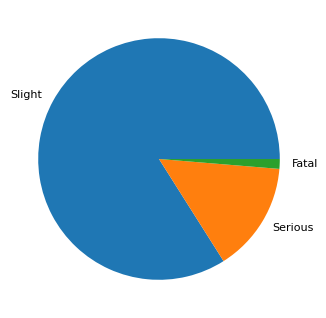

In [11]:
plt.figure(figsize=(5,5),dpi=80)
plt.pie(my_df.Count,labels=my_df.Type)
plt.show()

In [12]:
Light_array = accidents_df.Light_condition.value_counts()
Light_array

Daylight                       5641
Darkness - lights lit          4122
Darkness - no lighting         3989
Darkness - lighting unknown    1779
Darkness - lights unlit        1368
Unknown                          10
Name: Light_condition, dtype: int64

In [13]:
Light_array = accidents_df.Light_condition.value_counts()
Index_Array = Light_array.index.to_numpy()
Count_array = []
Type_array = []
for x in Index_Array:
    count = accidents_df.loc[accidents_df['Light_condition'] == x].Accidents.sum()
    Count_array.append(count)
    Type_array.append(x)

My_Light_df = pd.DataFrame({'Type': Type_array,
                   'Count': Count_array})
My_Light_df

,Type,Count
0,Daylight,1732459
1,Darkness - lights lit,472309
2,Darkness - no lighting,129690
3,Darkness - lighting unknown,31656
4,Darkness - lights unlit,12404
5,Unknown,16


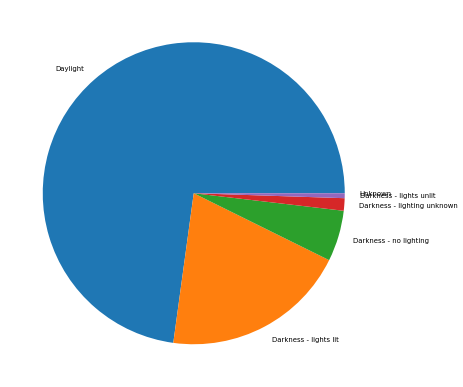

In [14]:
plt.figure(figsize=(10,10),dpi=50)
plt.pie(My_Light_df.Count,labels=My_Light_df.Type)
plt.show()

In [15]:
accidents_df.Weather_condition.value_counts()

Fine no high winds       4702
Raining no high winds    2922
Other                    1718
Raining + high winds     1682
Unknown                  1606
Fine + high winds        1515
Fog or mist              1202
Snowing no high winds     994
Snowing + high winds      568
Name: Weather_condition, dtype: int64

In [16]:
Weather_array = accidents_df.Weather_condition.value_counts()
Index_Array = Weather_array.index.to_numpy()
Count_array = []
Type_array = []
for x in Index_Array:
    count = accidents_df.loc[accidents_df['Weather_condition'] == x].Accidents.sum()
    Count_array.append(count)
    Type_array.append(x)

My_Weather_df = pd.DataFrame({'Type': Type_array,
                   'Count': Count_array})
My_Weather_df

,Type,Count
0,Fine no high winds,1902298
1,Raining no high winds,278932
2,Other,52354
3,Raining + high winds,32715
4,Unknown,52234
5,Fine + high winds,29581
6,Fog or mist,12420
7,Snowing no high winds,14999
8,Snowing + high winds,3001


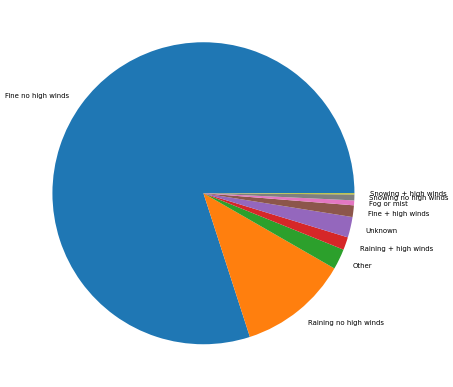

In [17]:
plt.figure(figsize=(10,10),dpi=50)
plt.pie(My_Weather_df.Count,labels=My_Weather_df.Type)
plt.show()

<Figure size 4500x4500 with 0 Axes>

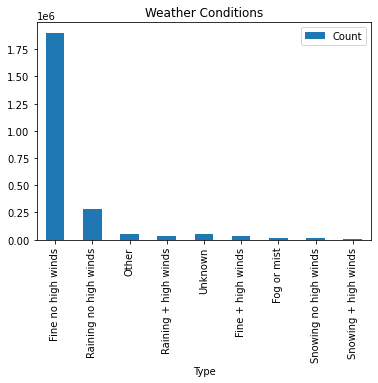

In [18]:
plt.figure(figsize=(50,50),dpi=90)
My_Weather_df.plot.bar(x="Type", y="Count", rot=90, title="Weather Conditions", );
plt.show(block=True);

In [19]:
accidents_df.Speed_limit.value_counts()


21-30 mph    3628
51-60 mph    3211
31-40 mph    2381
61-70 mph    2253
Motorway     2200
41-50 mph    1946
1-20 mph     1278
Unknown        12
Name: Speed_limit, dtype: int64

In [20]:
Speed_array = accidents_df.Speed_limit.value_counts()
Index_Array = Speed_array.index.to_numpy()
Count_array = []
Type_array = []
for x in Index_Array:
    count = accidents_df.loc[accidents_df['Speed_limit'] == x].Accidents.sum()
    Count_array.append(count)
    Type_array.append(x)

My_Speed_df = pd.DataFrame({'Speed': Type_array,'Count': Count_array})
My_Speed_df

,Speed,Count
0,21-30 mph,1499773
1,51-60 mph,356976
2,31-40 mph,195150
3,61-70 mph,81255
4,Motorway,94837
5,41-50 mph,78492
6,1-20 mph,72013
7,Unknown,38


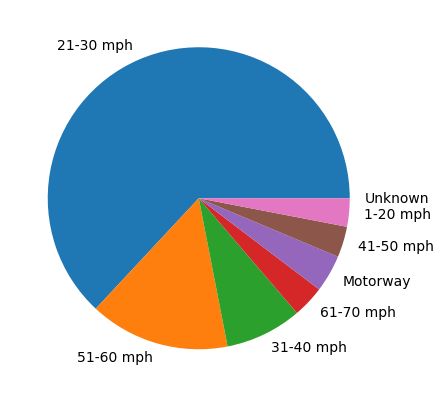

In [21]:
plt.figure(figsize=(5,5),dpi=100)
plt.pie(My_Speed_df.Count,labels=My_Speed_df.Speed)
plt.show()

<Figure size 4500x4500 with 0 Axes>

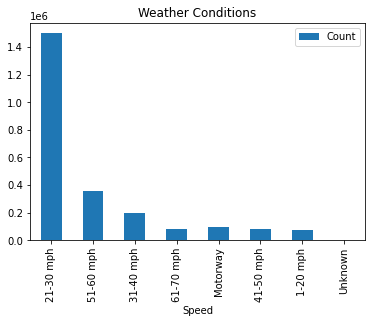

In [22]:
plt.figure(figsize=(50,50),dpi=90)
My_Speed_df.plot.bar(x="Speed", y="Count", rot=90, title="Weather Conditions", );
plt.show(block=True);

In [23]:
Carriageway_array = accidents_df.Carriageway_hazards.value_counts()
Index_Array = Carriageway_array.index.to_numpy()
Count_array = []
Type_array = []
for x in Index_Array:
    count = accidents_df.loc[accidents_df['Carriageway_hazards'] == x].Accidents.sum()
    Count_array.append(count)
    Type_array.append(x)

My_Carriageway_df = pd.DataFrame({'Carriageway_hazards': Type_array,'Count': Count_array})
My_Carriageway_df

,Carriageway_hazards,Count
0,None,2328661
1,Other object on road,19291
2,Any animal in carriageway (except ridden horse),11455
3,Previous accident,3674
4,Vehicle load on road,3136
5,Pedestrian in carriageway - not injured,5300
6,Unknown,7017


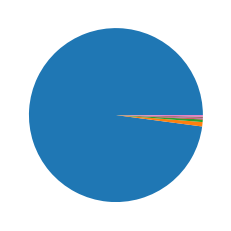

In [24]:
plt.pie(My_Carriageway_df.Count)
plt.show()

baraye in ke bebinim tekrari darad ya na

In [25]:
accidents_df.drop_duplicates(inplace=True)
accidents_df.describe()

,Year,Accidents,Adjusted serious,Adjusted slight
count,16909.000000,16909.000000,14615.000000,14615.000000
mean,2012.583358,140.666746,32.930422,127.688463
std,4.697672,1703.444933,306.030195,1694.845210
min,2005.000000,1.000000,0.000000,0.000000
25%,2008.000000,1.000000,0.137590,0.000000
50%,2013.000000,3.000000,1.000000,0.997180
75%,2017.000000,14.000000,3.650868,6.925192
max,2020.000000,68171.000000,8291.669215,63463.322440


In [26]:
accidents_df.head()

,Year,Severity,Speed_limit,Light_condition,Weather_condition,Carriageway_hazards,Accidents,Adjusted serious,Adjusted slight
0,2005,Fatal,1-20 mph,Daylight,Fine no high winds,None,5,NaN,NaN
1,2005,Fatal,1-20 mph,Daylight,Other,None,1,NaN,NaN
2,2005,Fatal,1-20 mph,Darkness - lights lit,Fine no high winds,None,2,NaN,NaN
3,2005,Fatal,21-30 mph,Daylight,Unknown,None,8,NaN,NaN
4,2005,Fatal,21-30 mph,Daylight,Fine no high winds,None,473,NaN,NaN


In [27]:
Count_accident_array = []
Year_accident_array = []
All_Accidents_Number = 0
year = 2005
for x in range(16):
    count = accidents_df.loc[accidents_df['Year'] == year].Accidents.sum()
    Count_accident_array.append(count)
    Year_accident_array.append(year)
    All_Accidents_Number += count
    year = year + 1

All_Accidents_Number

2378534

In [28]:
my_df = pd.DataFrame({'Year': Year_accident_array,'Count': Count_accident_array})
my_df

,Year,Count
0,2005,198735
1,2006,189161
2,2007,182115
3,2008,170591
4,2009,163554
5,2010,154414
6,2011,151474
7,2012,145571
8,2013,138660
9,2014,146322


In [29]:
my_df.Count.describe()

count        16.000000
mean     148658.375000
std       27866.202796
min       91187.000000
25%      134961.250000
50%      145946.500000
75%      165313.250000
max      198735.000000
Name: Count, dtype: float64

In [31]:
pearson_coefficent , _ = pearsonr(my_df.Year, my_df.Count)
pearson_coefficent

-0.9667706354453498

In [32]:
corr = my_df.corr()
corr

,Year,Count
Year,1.000000,-0.966771
Count,-0.966771,1.000000


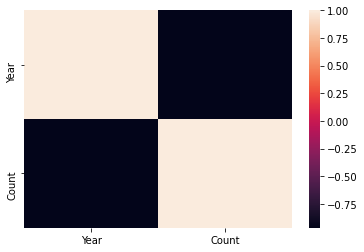

In [33]:
sb.heatmap(corr, xticklabels=my_df.columns, yticklabels = my_df.columns)
plt.show()

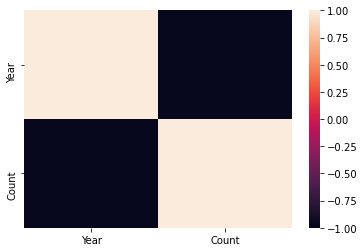

In [34]:
sb.heatmap(corr, xticklabels=corr.columns, yticklabels = corr.columns, vmin = -1, vmax = +1)
plt.show()

In [36]:
my_df_new = minmax_scale(my_df, feature_range=(0,1))

#my_df_new = normalize(my_df, norm='l1', axis = 0)
my_df_new

array([[0.        , 1.        ],
       [0.06666667, 0.91097928],
       [0.13333333, 0.84546435],
       [0.2       , 0.7383122 ],
       [0.26666667, 0.67288095],
       [0.33333333, 0.58789564],
       [0.4       , 0.56055901],
       [0.46666667, 0.50567189],
       [0.53333333, 0.44141221],
       [0.6       , 0.51265481],
       [0.66666667, 0.45439246],
       [0.73333333, 0.42245323],
       [0.8       , 0.36072265],
       [0.86666667, 0.29240897],
       [0.93333333, 0.24425373],
       [1.        , 0.        ]])

In [37]:
df_data = pd.DataFrame(my_df_new, index=my_df.index, columns=my_df.columns)
df_data
my_df = df_data
my_df.Count.describe()

count    16.000000
mean      0.534379
std       0.259105
min       0.000000
25%       0.407021
50%       0.509163
75%       0.689239
max       1.000000
Name: Count, dtype: float64

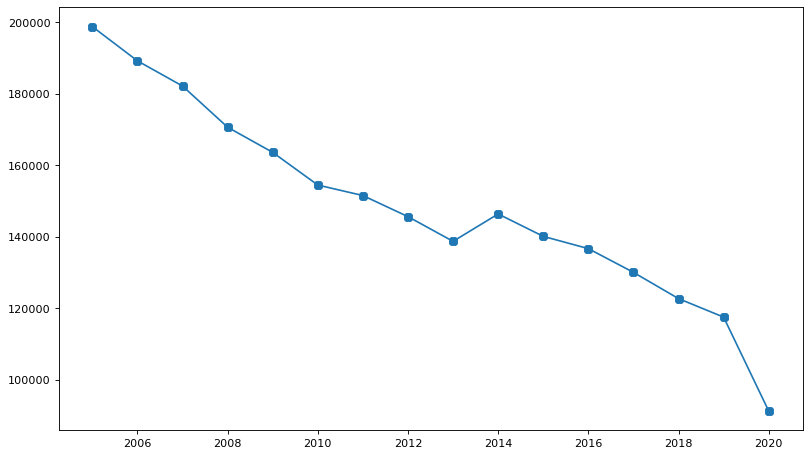

In [38]:
plt.figure(figsize=(12,7),dpi=80)
plt.plot(Year_accident_array, Count_accident_array, ls='-', marker='+',mew=8)

plt.show()

In [39]:
x = my_df.Year
y = my_df.Count

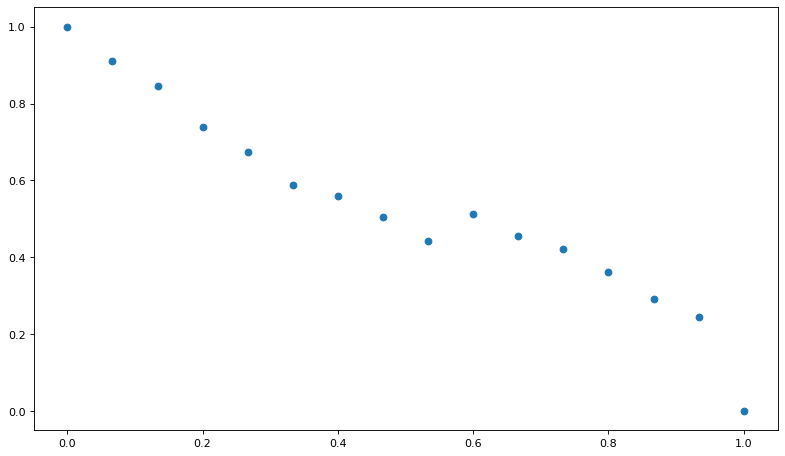

In [40]:
plt.figure(figsize=(12,7),dpi=80)
plt.scatter(x,y)
plt.show()

In [41]:
x = my_df[['Year']].to_numpy()
y = my_df[['Count']].to_numpy()


In [42]:
#Liner Regreassion

In [44]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [45]:
yhat = reg.predict(x)

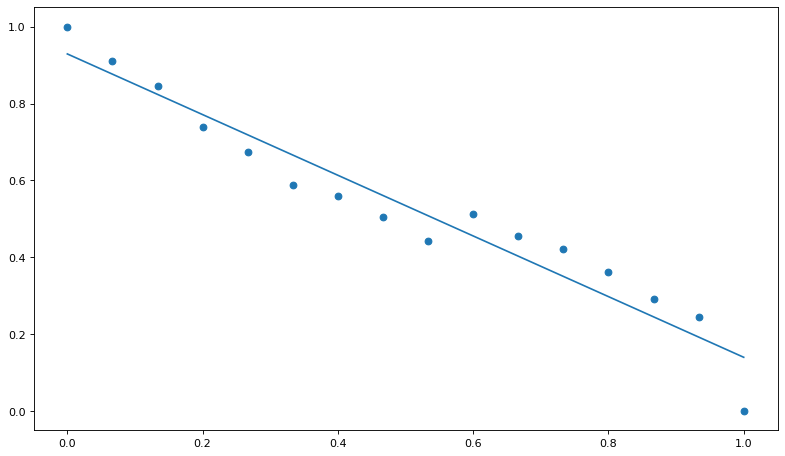

In [46]:
plt.figure(figsize=(12,7),dpi=80)
plt.scatter(x,y)
plt.plot(x,yhat)
plt.show()

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.8, random_state = 42) 

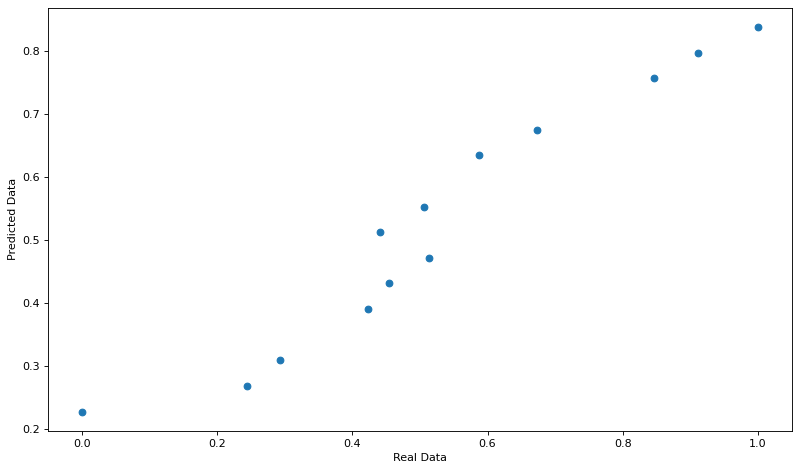

In [49]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

plt.figure(figsize=(12,7),dpi=80)
plt.scatter(y_test, y_pred)
plt.xlabel('Real Data')
plt.ylabel('Predicted Data')
plt.show()

In [51]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse

0.008633251315655953

In [53]:
cv_scores = cross_val_score(reg, x, y, cv=3)
cv_scores

array([ 0.81466742, -0.90063936,  0.59692966])

In [54]:
np.mean(cv_scores)

0.17031923927536588

In [56]:
mse_array = []
alpha_array = []
_alpha = 0.1
for i in range(10):
    ridge = Ridge(alpha = _alpha, normalize = True)
    ridge.fit(x, y)
    ridge_pred = ridge.predict(x)
    mse = metrics.mean_squared_error(y, ridge_pred)
    mse_array.append(mse)
    alpha_array.append(_alpha)
    _alpha += 0.1
mse_array

[0.004599536561523161,
 0.005747426217161396,
 0.007246115426454472,
 0.008915491425219382,
 0.010649590275945852,
 0.01238577338009868,
 0.014087324702406008,
 0.015733315966537147,
 0.017312550104690745,
 0.018819863707253276]

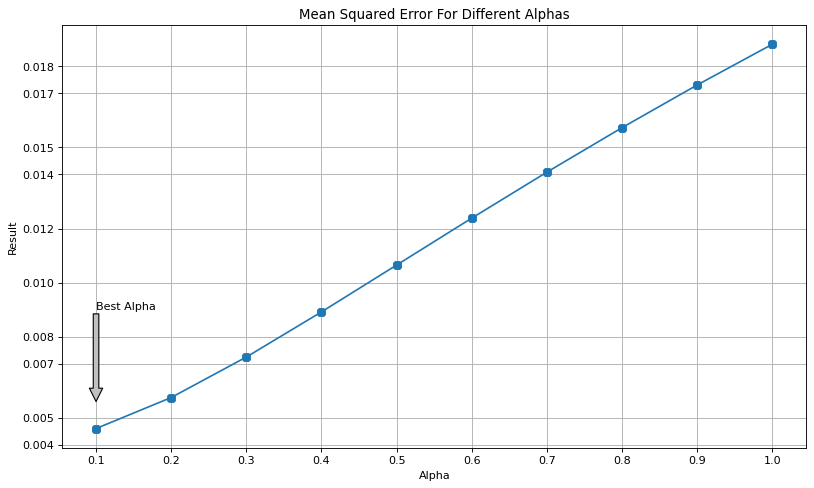

In [57]:
plt.figure(figsize=(12,7),dpi=80)
turkey_pop = [27.47,34.88,43.98,53.92,63.24,72.33,79.51]
plt.plot(alpha_array, mse_array, ls='-', marker='+',mew=8)
plt.title('Mean Squared Error For Different Alphas')
plt.xlabel('Alpha')
plt.ylabel('Result')
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.yticks([0.004, 0.005, 0.007, 0.008, 0.010, 0.012, 0.014, 0.015,0.017,0.018])
plt.grid()
plt.annotate('Best Alpha', xytext=(0.1,0.009),fontsize=10, xy=(0.1,0.005599536561523161), arrowprops=dict(facecolor='silver',width=5))
plt.yticks
plt.show()

In [58]:
cv_scores = cross_val_score(ridge, x, y, cv=2)
cv_scores

array([-0.16481273,  0.2515358 ])

In [59]:
np.mean(cv_scores)

0.04336153585500363

comparying

In [60]:
accidents_df.head()

,Year,Severity,Speed_limit,Light_condition,Weather_condition,Carriageway_hazards,Accidents,Adjusted serious,Adjusted slight
0,2005,Fatal,1-20 mph,Daylight,Fine no high winds,None,5,NaN,NaN
1,2005,Fatal,1-20 mph,Daylight,Other,None,1,NaN,NaN
2,2005,Fatal,1-20 mph,Darkness - lights lit,Fine no high winds,None,2,NaN,NaN
3,2005,Fatal,21-30 mph,Daylight,Unknown,None,8,NaN,NaN
4,2005,Fatal,21-30 mph,Daylight,Fine no high winds,None,473,NaN,NaN


In [61]:
accidents_df.Severity.value_counts()

Slight     9305
Serious    5310
Fatal      2294
Name: Severity, dtype: int64

In [62]:
accidents_df.Severity.replace({'Slight': 1},inplace = True)
accidents_df.Severity.replace({'Serious': 2},inplace = True)
accidents_df.Severity.replace({'Fatal': 3},inplace = True)
accidents_df = accidents_df.astype({'Severity':'int'})

In [63]:
accidents_df.Severity.value_counts()

1    9305
2    5310
3    2294
Name: Severity, dtype: int64

In [64]:
accidents_df.Light_condition.value_counts()

Daylight                       5641
Darkness - lights lit          4122
Darkness - no lighting         3989
Darkness - lighting unknown    1779
Darkness - lights unlit        1368
Unknown                          10
Name: Light_condition, dtype: int64

In [66]:
accidents_df.Light_condition.value_counts()

1    5641
2    4122
3    3989
4    1779
5    1368
6      10
Name: Light_condition, dtype: int64

In [67]:
accidents_df.Speed_limit.value_counts()

21-30 mph    3628
51-60 mph    3211
31-40 mph    2381
61-70 mph    2253
Motorway     2200
41-50 mph    1946
1-20 mph     1278
Unknown        12
Name: Speed_limit, dtype: int64

In [68]:
accidents_df.Speed_limit.replace({'1-20 mph': 1},inplace = True)
accidents_df.Speed_limit.replace({'21-30 mph': 2},inplace = True)
accidents_df.Speed_limit.replace({'31-40 mph': 3},inplace = True)
accidents_df.Speed_limit.replace({'41-50 mph': 4},inplace = True)
accidents_df.Speed_limit.replace({'51-60 mph': 5},inplace = True)
accidents_df.Speed_limit.replace({'61-70 mph': 6},inplace = True)
accidents_df.Speed_limit.replace({'Motorway': 7},inplace = True)
accidents_df.Speed_limit.replace({'Unknown': 8},inplace = True)

accidents_df = accidents_df.astype({'Speed_limit':'int'})

In [69]:
accidents_df.Speed_limit.value_counts()

2    3628
5    3211
3    2381
6    2253
7    2200
4    1946
1    1278
8      12
Name: Speed_limit, dtype: int64

In [70]:
accidents_df.Weather_condition.value_counts()

Fine no high winds       4702
Raining no high winds    2922
Other                    1718
Raining + high winds     1682
Unknown                  1606
Fine + high winds        1515
Fog or mist              1202
Snowing no high winds     994
Snowing + high winds      568
Name: Weather_condition, dtype: int64

In [71]:
accidents_df.Weather_condition.replace({'Fine no high winds': 1},inplace = True)
accidents_df.Weather_condition.replace({'Raining no high winds': 2},inplace = True)
accidents_df.Weather_condition.replace({'Raining + high winds': 3},inplace = True)
accidents_df.Weather_condition.replace({'Fine + high winds': 4},inplace = True)
accidents_df.Weather_condition.replace({'Fog or mist': 5},inplace = True)
accidents_df.Weather_condition.replace({'Snowing no high winds': 6},inplace = True)
accidents_df.Weather_condition.replace({'Snowing + high winds': 7},inplace = True)
accidents_df.Weather_condition.replace({'Other': 8},inplace = True)
accidents_df.Weather_condition.replace({'Unknown': 9},inplace = True)

accidents_df = accidents_df.astype({'Weather_condition':'int'})

In [72]:
accidents_df.Weather_condition.value_counts()

1    4702
2    2922
8    1718
3    1682
9    1606
4    1515
5    1202
6     994
7     568
Name: Weather_condition, dtype: int64

In [73]:
accidents_df.Carriageway_hazards.value_counts()

None                                               9192
Other object on road                               2562
Any animal in carriageway (except ridden horse)    1643
Previous accident                                  1330
Vehicle load on road                                843
Pedestrian in carriageway - not injured             775
Unknown                                             564
Name: Carriageway_hazards, dtype: int64

In [74]:
accidents_df.Carriageway_hazards.replace({'None': 1},inplace = True)
accidents_df.Carriageway_hazards.replace({'Other object on road': 2},inplace = True)
accidents_df.Carriageway_hazards.replace({'Any animal in carriageway (except ridden horse)': 3},inplace = True)
accidents_df.Carriageway_hazards.replace({'Previous accident': 4},inplace = True)
accidents_df.Carriageway_hazards.replace({'Vehicle load on road': 5},inplace = True)
accidents_df.Carriageway_hazards.replace({'Pedestrian in carriageway - not injured': 6},inplace = True)
accidents_df.Carriageway_hazards.replace({'Unknown': 7},inplace = True)


accidents_df = accidents_df.astype({'Carriageway_hazards':'int'})

In [75]:
accidents_df.Carriageway_hazards.value_counts()

1    9192
2    2562
3    1643
4    1330
5     843
6     775
7     564
Name: Carriageway_hazards, dtype: int64

In [76]:
accidents_df.drop(['Adjusted serious','Adjusted slight'], axis = 1, inplace = True)

In [77]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16909 entries, 0 to 16908
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 16909 non-null  int64
 1   Severity             16909 non-null  int32
 2   Speed_limit          16909 non-null  int32
 3   Light_condition      16909 non-null  int32
 4   Weather_condition    16909 non-null  int32
 5   Carriageway_hazards  16909 non-null  int32
 6   Accidents            16909 non-null  int64
dtypes: int32(5), int64(2)
memory usage: 726.6 KB


In [78]:
accidents_df

,Year,Severity,Speed_limit,Light_condition,Weather_condition,Carriageway_hazards,Accidents
0,2005,3,1,1,1,1,5
1,2005,3,1,1,8,1,1
2,2005,3,1,2,1,1,2
3,2005,3,2,1,9,1,8
4,2005,3,2,1,1,1,473
...,...,...,...,...,...,...,...
16904,2020,1,7,4,1,2,1
16905,2020,1,7,4,2,1,10
16906,2020,1,7,4,3,1,3
16907,2020,1,7,4,5,1,1


In [105]:
x = accidents_df.iloc[:,2:6]
y =  accidents_df.iloc[:,-1]


In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 42) 

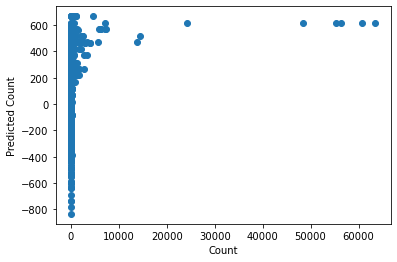

In [86]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Count')
plt.ylabel('Predicted Count')
plt.show()

In [87]:
import sklearn.metrics as metrics

In [88]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse

5162465.991061102

In [98]:
new_x= accidents_df.iloc[:,2:6]
new_y = accidents_df.iloc[:,-1]
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, new_y, test_size=0.3, random_state = 42)
new_reg = LinearRegression()
new_reg.fit(new_x_train, new_y_train)
new_y_pred = new_reg.predict(new_x_test)
new_mse = metrics.mean_squared_error(new_y_test, new_y_pred)
new_mse

4163525.5716751884

In [ ]:
#LASSO REGRESSION

In [99]:
from sklearn.model_selection import cross_val_score
reg = LinearRegression()

In [100]:
cv_scores = cross_val_score(reg, x, y, cv=5)
cv_scores

array([0.01771267, 0.01962325, 0.02108304, 0.01688667, 0.00737256])

In [101]:
np.mean(cv_scores)

0.01653564003927317

In [102]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(x,y)
lasso_coeff = lasso.coef_

print( lasso_coeff)

[-46.71711282 -96.33741752 -47.29309763 -77.94629287]


In [1]:
Last_accidents_df = pd.read_csv(r'C:\Users\B1674080\OneDrive - Teesside University\AI ethics and apps\AS 2\SC\Years2019-2020 Accidents.csv')

In [2]:
Last_accidents_df

In [ ]:
pd.plotting.scatter_matrix(Last_accidents_df,figsize=[15,15])
plt.show()

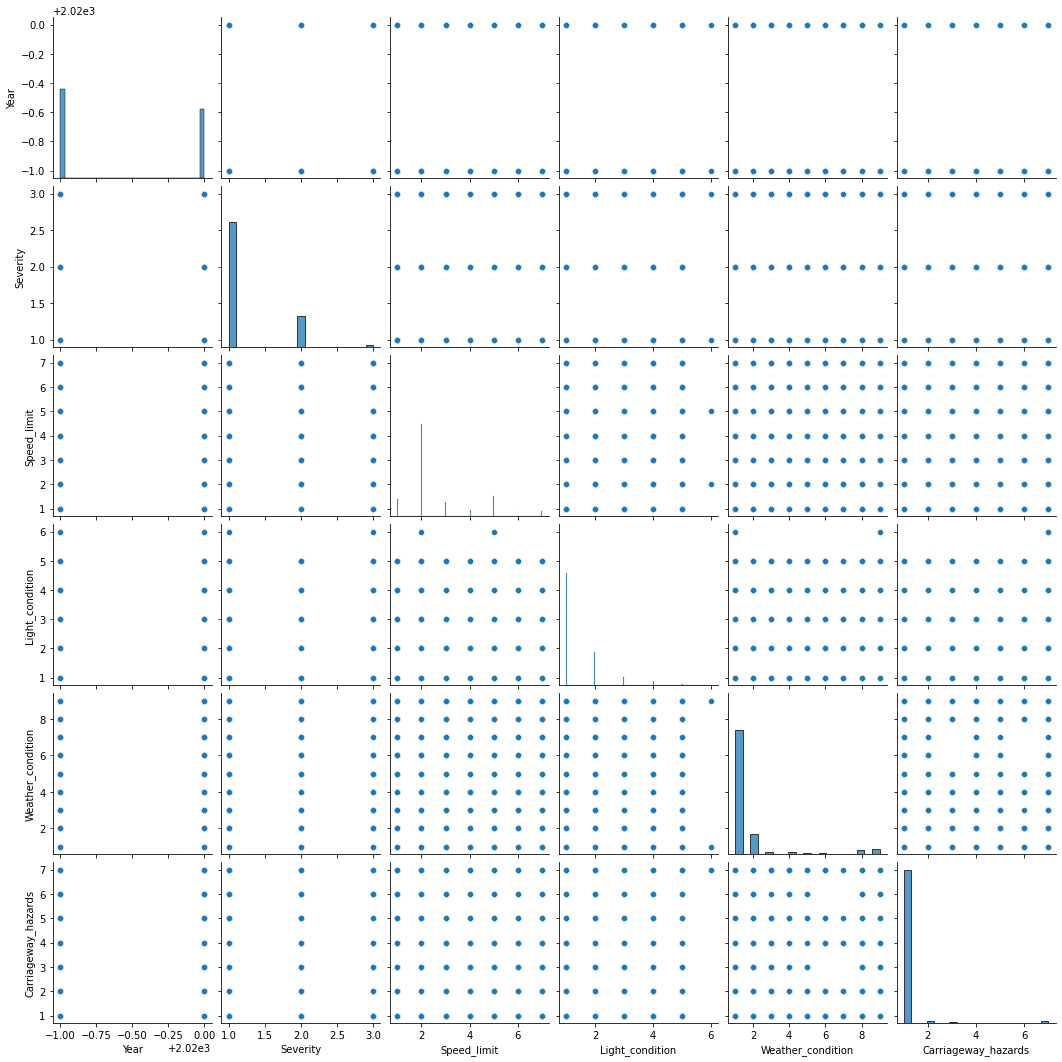

In [8]:
sb.pairplot(Last_accidents_df)
plt.show()

In [24]:
def ECDF(data):
    n = len(data)
    x =  np.sort(data)
    y = np.arange(1,n+1) / n
    return x,y

In [28]:
x, y = ECDF(accidents_df.Accidents)
x

array([    1,     1,     1, ..., 60750, 63500, 68171], dtype=int64)

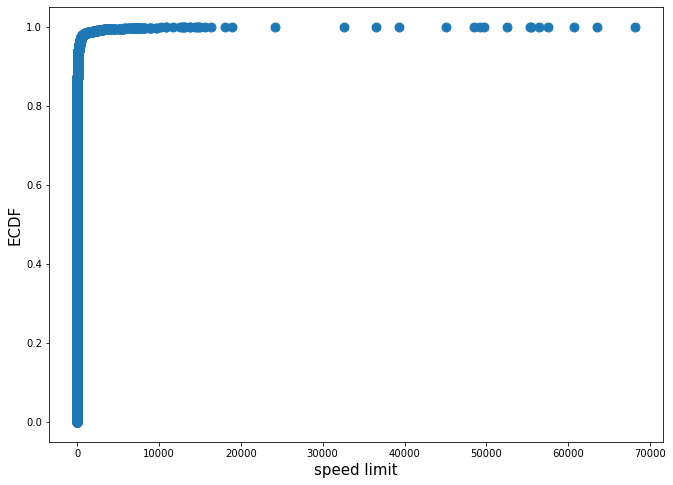

In [29]:
plt.figure(figsize=(11,8))
plt.scatter(x,y, s=80)
plt.margins(0.05)
plt.xlabel('speed limit', fontsize = 15)
plt.ylabel('ECDF', fontsize = 15)
plt.show()

<AxesSubplot:xlabel='Accidents'>

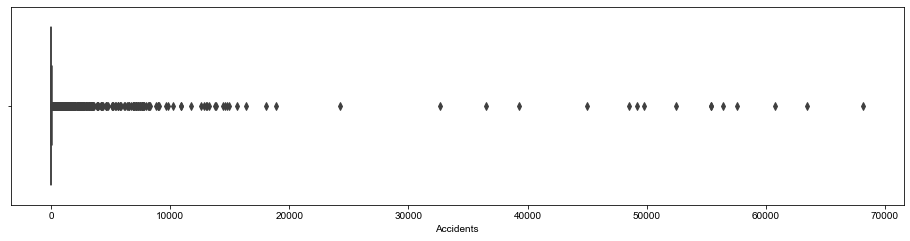

In [30]:
plt.figure(figsize = (16,8))
plt.subplot(2,1,1)
import seaborn as sns
sns.set_style("whitegrid")
sns.boxplot(x = accidents_df.Accidents)

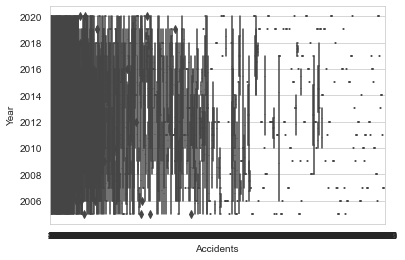

In [31]:
sb.boxplot(x='Accidents', y='Year', data = accidents_df)
plt.show()

<AxesSubplot:xlabel='Speed_limit'>

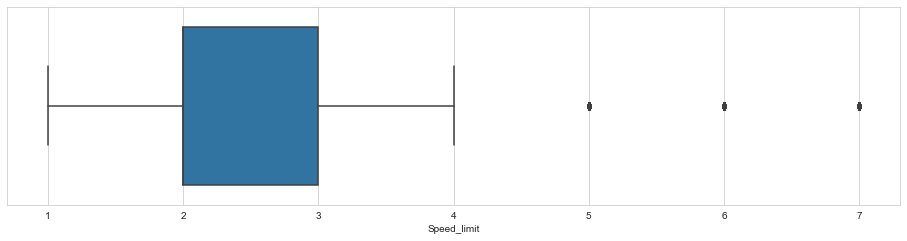

In [78]:
plt.figure(figsize = (16,8))
plt.subplot(2,1,1)
import seaborn as sns
sns.set_style("whitegrid")
sns.boxplot(x = Last_accidents_df.Speed_limit)

<AxesSubplot:xlabel='Light_condition'>

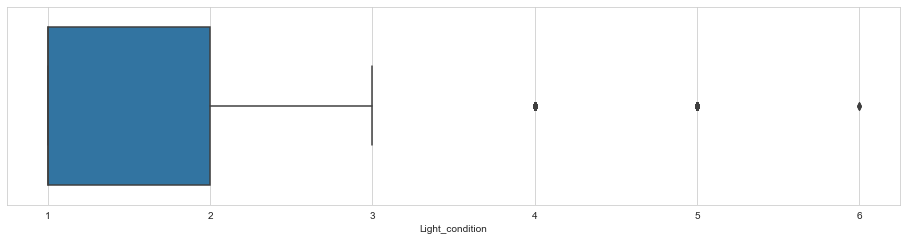

In [79]:
plt.figure(figsize = (16,8))
plt.subplot(2,1,1)
import seaborn as sns
sns.set_style("whitegrid")
sns.boxplot(x = Last_accidents_df.Light_condition)


<AxesSubplot:xlabel='Weather_condition'>

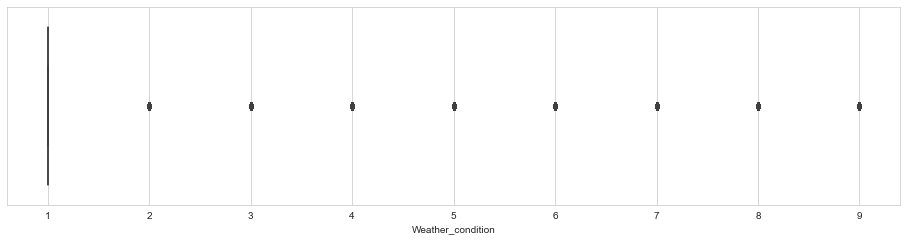

In [80]:
plt.figure(figsize = (16,8))
plt.subplot(2,1,1)
import seaborn as sns
sns.set_style("whitegrid")
sns.boxplot(x = Last_accidents_df.Weather_condition)

<AxesSubplot:xlabel='Carriageway_hazards'>

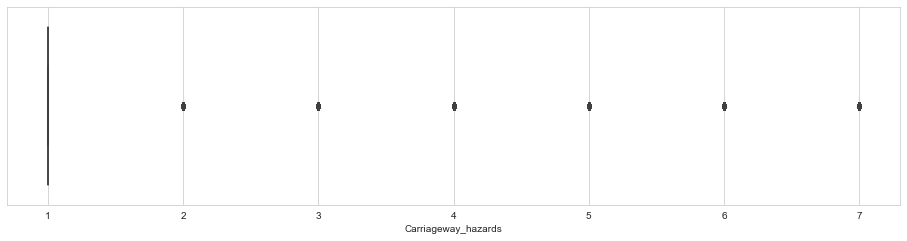

In [81]:
plt.figure(figsize = (16,8))
plt.subplot(2,1,1)
import seaborn as sns
sns.set_style("whitegrid")
sns.boxplot(x = Last_accidents_df.Carriageway_hazards)


In [ ]:
count = accidents_df.iloc[0].Accidents.astype('int')  
for ii in range(count):
    print(ii)

In [66]:

for x in accidents_df.index:
    count = accidents_df.iloc[x].Accidents  
    for y in count:
        

count

2

In [ ]:
Carriageway_array = accidents_df.Carriageway_hazards.value_counts()
Index_Array = Carriageway_array.index.to_numpy()
Count_array = []
Type_array = []
for x in Index_Array:
    count = accidents_df.loc[accidents_df['Carriageway_hazards'] == x].Accidents.sum()
    Count_array.append(count)
    Type_array.append(x)

My_Carriageway_df = pd.DataFrame({'Carriageway_hazards': Type_array,'Count': Count_array})
My_Carriageway_df

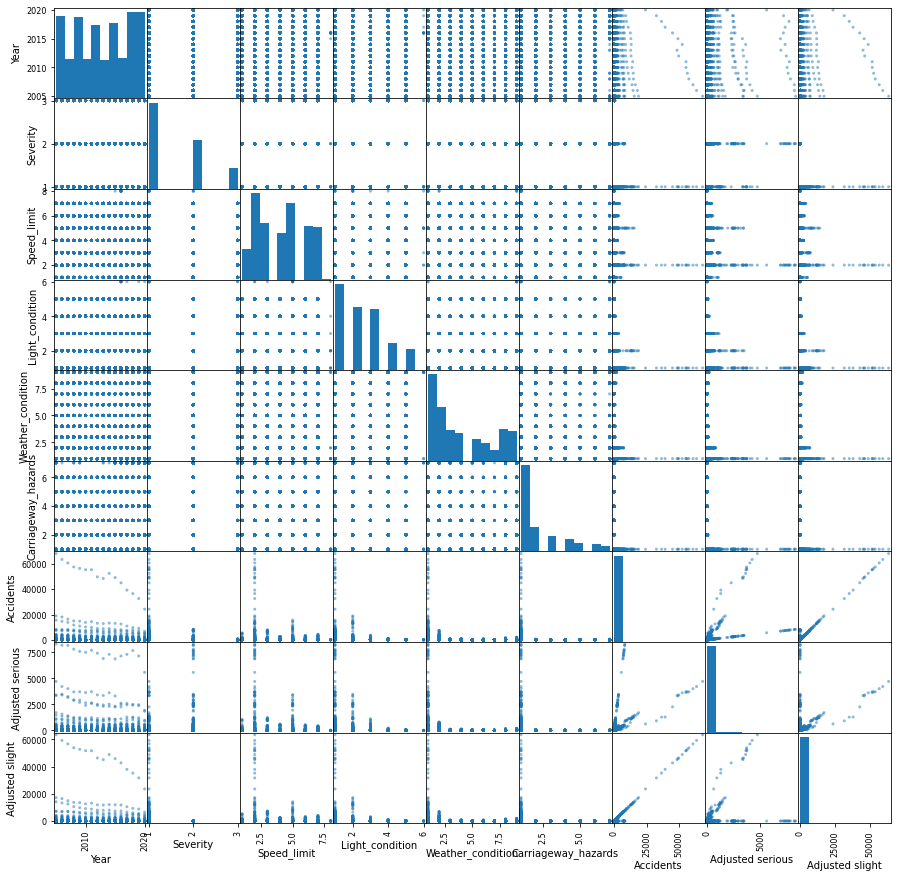

In [52]:
pd.plotting.scatter_matrix(accidents_df,figsize=[15,15])
plt.show()

In [45]:
import seaborn as sb

In [46]:
Data_df = accidents_df.drop(['Accidents'], axis = 1)
Data_df

,Year,Severity,Speed_limit,Light_condition,Weather_condition,Carriageway_hazards,Adjusted serious,Adjusted slight
0,2005,3,1,1,1,1,NaN,NaN
1,2005,3,1,1,8,1,NaN,NaN
2,2005,3,1,2,1,1,NaN,NaN
3,2005,3,2,1,9,1,NaN,NaN
4,2005,3,2,1,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...
16904,2020,1,7,4,1,2,0.012649,0.987351
16905,2020,1,7,4,2,1,0.021170,9.978830
16906,2020,1,7,4,3,1,0.003871,2.996129
16907,2020,1,7,4,5,1,0.012512,0.987488


In [47]:
Target_df = accidents_df.drop(['Year','Severity','Speed_limit','Light_condition','Weather_condition','Carriageway_hazards'], axis = 1)
Target_df

,Accidents,Adjusted serious,Adjusted slight
0,5,NaN,NaN
1,1,NaN,NaN
2,2,NaN,NaN
3,8,NaN,NaN
4,473,NaN,NaN
...,...,...,...
16904,1,0.012649,0.987351
16905,10,0.021170,9.978830
16906,3,0.003871,2.996129
16907,1,0.012512,0.987488


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [49]:
x = accidents_df.iloc[:,:6]
y =  accidents_df.iloc[:,-1]

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [3]:
knn = KNeighborsClassifier(n_neighbors=2, metric = 'minkowski', p=2)
knn.fit(x_train,y_train)

In [ ]:
y_pre = knn.predict(x_test)
y_pre

In [ ]:
knn.score(x_train, y_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
Predict_dtc = dtc.predict(x_test)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, Predict_dtc)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

y_pred

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Accidents')
plt.ylabel('predictAccidents')
plt.show()

In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse

In [ ]:
from sklearn.model_selection import cross_val_score

reg = LinearRegression()